In [ ]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [ ]:
from dotenv import load_dotenv
load_dotenv()

In [ ]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [20]:
pd.set_option("display.max_columns",None)

In [31]:
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2010-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["NRG","VNO","UAL", "XRX", "ALK", "CCL", "UNM", "CINF", "CMA", "HFC", "DAL", "COP", "MET", "C", "WFC"]

# Get 5 year's worth of historical price data
low_pe_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
low_pe_ticker.head()

ALK                                       C  \
                             open    high     low   close   volume   open   
2010-05-03 00:00:00-04:00  10.825  11.518  10.765  11.303  5463884  428.9   
2010-05-04 00:00:00-04:00  11.240  11.240  10.473  10.620  2934044  417.1   
2010-05-05 00:00:00-04:00  10.475  10.790  10.253  10.598  2996728   41.6   
2010-05-06 00:00:00-04:00  10.528  10.653   9.258   9.913  3980064  405.9   
2010-05-07 00:00:00-04:00   9.950  10.550   9.808  10.260  5401092  392.4   

                                                              CCL           \
                            high    low  close      volume   open     high   
2010-05-03 00:00:00-04:00  430.8   43.9   44.1  20580156.0  33.69  42.4800   
2010-05-04 00:00:00-04:00  419.0  406.5  409.7   9177306.0  33.26  40.8500   
2010-05-05 00:00:00-04:00  408.2   40.4  402.0  59998445.0  39.69  40.3500   
2010-05-06 00:00:00-04:00  412.7  376.9  388.5  16204096.0  39.22  39.7401   
2010-05-07 00:00:00-04:00  397.2   39.6   40.0  34951494.0  37.38  37.6600   

                                                   CINF                       \
                             low  close   volume   open   high    low  close   
2010-05-03 00:00:00-04:00  33.57  33.96  3424515  28.57  28.99  28.49  28.82   
2010-05-04 00:00:00-04:00  32.60  40.59  5019318  28.47  28.47  27.79  28.00   
2010-05-05 00:00:00-04:00  39.23  39.59  5715460  27.76  28.11  27.07  27.91   
2010-05-06 00:00:00-04:00  35.62  38.03  7696202  27.87  28.02  26.11  26.99   
2010-05-07 00:00:00-04:00  29.27  29.37  9987287  27.13  27.34  26.47  26.58   

                                      CMA                                   \
                            volume   open   high    low  close      volume   
2010-05-03 00:00:00-04:00   993014  42.41  43.18  42.36  43.13   1999005.0   
2010-05-04 00:00:00-04:00  1346911  42.55  42.75  41.75  42.11   2776520.0   
2010-05-05 00:00:00-04:00  1670965  41.24  42.91  40.88  42.59   3952384.0   
2010-05-06 00:00:00-04:00  2439343  42.18  42.85  39.44  41.48   6873456.0   
2010-05-07 00:00:00-04:00  2635133  40.27  40.93  39.49  40.30  10295696.0   

                             COP                                      DAL  \
                            open   high      low  close    volume    open   
2010-05-03 00:00:00-04:00  59.52  60.53  59.4200  59.71  11817144  11.456   
2010-05-04 00:00:00-04:00  59.02  59.11  57.2300  58.01  13162625  11.457   
2010-05-05 00:00:00-04:00  56.76  57.10  55.8602  56.76  13786926  11.510   
2010-05-06 00:00:00-04:00  56.27  56.83  52.0000  54.98  19242315  12.150   
2010-05-07 00:00:00-04:00  54.56  55.72  53.7900  54.65  18131803  10.908   

                                                               HFC          \
                            high     low   close    volume    open    high   
2010-05-03 00:00:00-04:00  12.71  11.382  11.718  12366817  13.535  13.985   
2010-05-04 00:00:00-04:00  11.99  10.974  11.770  18833305  13.790  13.790   
2010-05-05 00:00:00-04:00  12.42  11.300  12.300  23608066  13.310  13.665   
2010-05-06 00:00:00-04:00  12.53  10.169  10.908  22254230  13.360  13.665   
2010-05-07 00:00:00-04:00  12.29  10.602  11.710  22995821  12.720  13.150   

                                                        MET                \
                              low   close     volume   open   high    low   
2010-05-03 00:00:00-04:00  13.415  13.945  1164140.0  45.95  46.45  45.60   
2010-05-04 00:00:00-04:00  13.260  13.540  2358500.0  45.07  45.21  44.13   
2010-05-05 00:00:00-04:00  12.765  13.270  2510560.0  43.87  44.54  43.58   
2010-05-06 00:00:00-04:00  12.020  12.620  2218480.0  43.78  43.95  38.14   
2010-05-07 00:00:00-04:00  12.165  12.315  2719340.0  42.15  42.73  40.07   

                                                NRG                         \
                           close      volume   open    high    low   close   
2010-05-03 00:00:00-04:00  45.76   5360338.0  24.34 

In [34]:
MC_low = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = 500,
    num_trading_days = 252*20
)

# Print the simulation input data
MC_low.portfolio_data.head()

AAL                                              \
                            open   high    low  close    volume daily_return   
2015-05-01 00:00:00-04:00  47.39  49.58  47.25  49.39   7524744          NaN   
2015-05-04 00:00:00-04:00  49.41  50.08  47.60  47.68   5053530    -0.034622   
2015-05-05 00:00:00-04:00  46.96  47.86  46.23  47.01  10578837    -0.014052   
2015-05-06 00:00:00-04:00  46.78  47.64  45.38  45.83   8572046    -0.025101   
2015-05-07 00:00:00-04:00  47.40  49.62  47.40  49.06  10403229     0.070478   

                               C                                              \
                            open   high    low  close    volume daily_return   
2015-05-01 00:00:00-04:00  51.79  51.98  51.47  51.90  12205801          NaN   
2015-05-04 00:00:00-04:00  52.00  52.40  51.89  52.30  15268149     0.007707   
2015-05-05 00:00:00-04:00  52.15  52.45  51.43  51.51  18268370    -0.015105   
2015-05-06 00:00:00-04:00  51.70  52.03  50.53  51.00  18308566    -0.009901   
2015-05-07 00:00:00-04:00  50.81  51.63  50.64  51.52  13728665     0.010196   

                             CCL                                              \
                            open   high     low  close   volume daily_return   
2015-05-01 00:00:00-04:00  43.88  44.58  43.880  44.52  2321921          NaN   
2015-05-04 00:00:00-04:00  44.66  44.87  40.730  44.33  2030773    -0.004268   
2015-05-05 00:00:00-04:00  43.96  44.15  39.840  39.89  2240518    -0.100158   
2015-05-06 00:00:00-04:00  39.89  43.46  39.730  43.46  3223694     0.089496   
2015-05-07 00:00:00-04:00  44.17  44.71  44.035  44.49  3894769     0.023700   

                             COP                                              \
                            open   high     low  close   volume daily_return   
2015-05-01 00:00:00-04:00  67.67  67.98  66.970  67.43  4918650          NaN   
2015-05-04 00:00:00-04:00  67.41  67.62  66.703  67.07  5664566    -0.005339   
2015-05-05 00:00:00-04:00  67.44  68.36  66.980  67.21  8022240     0.002087   
2015-05-06 00:00:00-04:00  67.97  68.17  66.790  67.23  6232764     0.000298   
2015-05-07 00:00:00-04:00  67.53  67.53  66.100  66.61  5074950    -0.009222   

                             DAL                                    \
                            open   high     low    close    volume   
2015-05-01 00:00:00-04:00  44.81  46.03  44.680  45.6700   9277426   
2015-05-04 00:00:00-04:00  45.91  46.50  42.730  42.8000   8505670   
2015-05-05 00:00:00-04:00  41.94  44.31  41.560  43.9051  10489337   
2015-05-06 00:00:00-04:00  43.54  44.26  42.835  44.0700  10660287   
2015-05-07 00:00:00-04:00  44.27  45.97  44.270  45.3700  12364408   

                                          HFC                          \
                          daily_return   open   high     low    close   
2015-05-01 00:00:00-04:00          NaN  38.78  39.80  38.670  39.7000   
2015-05-04 00:00:00-04:00    -0.062842  39.78  39.78  38.765  38.9400   
2015-05-05 00:00:00-04:00     0.025820  38.97  39.31  38.890  39.0800   
2015-05-06 00:00:00-04:00     0.003756  40.45  41.20  38.900  39.5100   
2015-05-07 00:00:00-04:00     0.029499  39.81  41.95  39.650  41.6401   

                                                    NCLH                       \
                              volume daily_return   open   high    low  close   
2015-05-01 00:00:00-04:00  1864996.0          NaN  48.60  49.33  48.31  49.25   
2015-05-04 00:00:00-04:00  1270280.0    -0.019144  49.48  50.04  48.95  49.16   
2015-05-05 00:00:00-04:00  1665825.0     0.003595  48.92  49.14  48.32  48.36   
2015-05-06 00:00:00-04:00  4012511.0     0.011003  48.09  48.89  48.03  48.69   
2015-05-07 00:00:00-04:00  4191214.0     0.053913  49.18  53.18  48.77  52.22   

                                                NLOK                        \
                            volume daily_return open high low close volume   
2015-05-01 00:00:00-04:00   568769          NaN  NaN  NaN 

In [ ]:
MC_low.calc_cumulative_return()

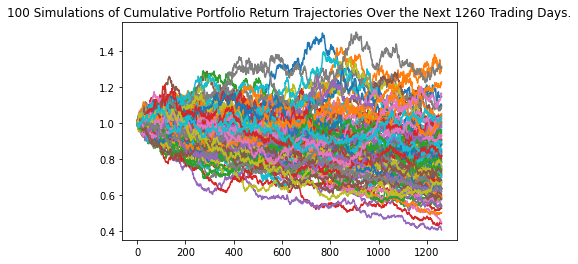

In [16]:
line_plot = MC_low.plot_simulation()